In [25]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as sc_special
from sklearn.metrics import mean_squared_error

In [26]:
df_test = pd.read_csv('peak_data.csv')
# new_time = np.arange(0, len(df_test['Testtime [s]']))
# df_test['Testtime [s]'] = new_time
drive_cycle = df_test.to_numpy()
time_data = drive_cycle[:, 1]  # Time data in seconds
current_data = drive_cycle[:, 2]  # Current data in amperes

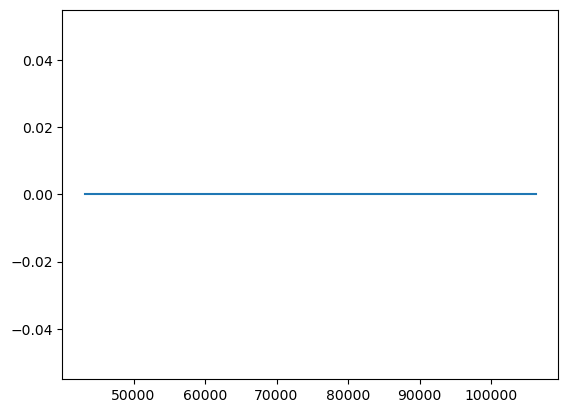

In [35]:
plt.plot(time_data, current_data)

In [27]:
time_data.shape[0]

241

In [28]:
# Step 1：Creating Interpolation Functions
# Creating interpolant functions with pybamm.Interpolant
current_interpolant = pybamm.Interpolant(time_data, current_data, pybamm.t)

# Step 2：Using Interpolation Functions in Models
# Create a simple DFN model
model = pybamm.lithium_ion.DFN()

# Setting the current function）
param = pybamm.ParameterValues("OKane2022")
param["Current function [A]"] = current_interpolant

# Creating Simulation Objects
solver = pybamm.CasadiSolver(mode="fast")
simulation = pybamm.Simulation(model, parameter_values=param, solver=solver)

# Running simulations with time ranges consistent with data
solution = simulation.solve()  
# simulation.plot()

# Getting results
time = solution["Time [s]"].entries
current = solution["Current [A]"].entries
voltage = solution["Terminal voltage [V]"].entries

In [29]:
#
voltage_ex = df_test["Voltage[V]"].to_numpy()
time_ex = df_test["Testtime [s]"].to_numpy()

In [30]:
df_test.shape[0]

241

In [31]:
len(voltage)

241

In [32]:
df_sim = pd.DataFrame()
df_sim["Testtime [s]"] = time
df_sim["Voltage[V]"] = voltage

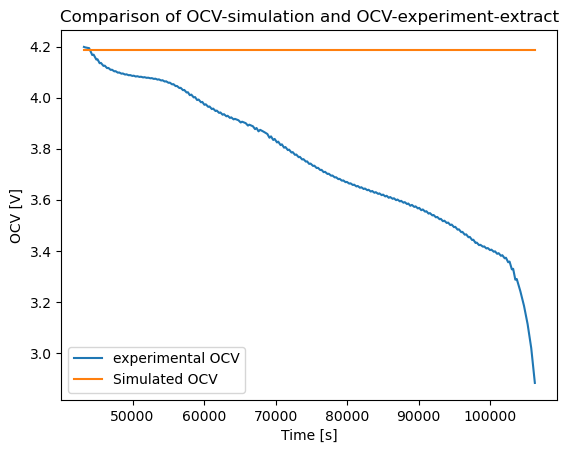

In [34]:
plt.plot(time_ex, voltage_ex, label='experimental OCV')
plt.plot(time, voltage, label='Simulated OCV')
plt.xlabel('Time [s]')
plt.ylabel('OCV [V]')
plt.title('Comparison of OCV-simulation and OCV-experiment-extract')
plt.legend()
plt.show()

In [24]:
#MSE between v_t and v_hat_t:
#Ensure that the number of OCV data is the same
#Extract the voltage and time columns in data_ocv_ex and data_ocv_sim
v_t = df_test[['Testtime [s]', 'Voltage[V]']]
v_hat_t = df_sim[['Testtime [s]', 'Voltage[V]']]
# Calculate the mean square error
FF_V = mean_squared_error(v_t['Voltage[V]'], v_hat_t['Voltage[V]'])

print(f'The Mean Squared Error between the two sets of voltage data is:{FF_V}')

The Mean Squared Error between the two sets of voltage data is:0.2513786669357519
